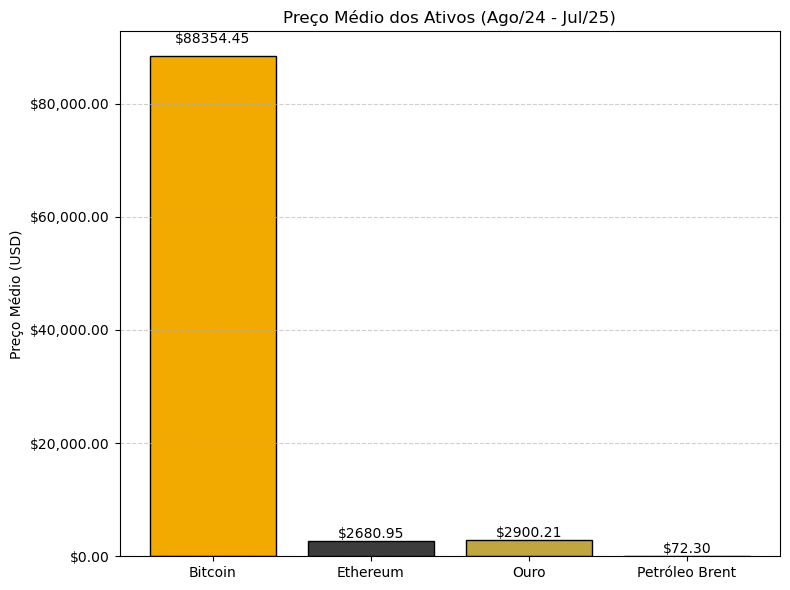

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

assets = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Ouro': 'GC=F',
    'Petróleo Brent': 'BZ=F'
}

start = '2024-08-01'
end = '2025-07-31'

precos = {}
for name, ticker in assets.items():
    data = yf.download(ticker, start=start, end=end, interval='1d', progress=False, auto_adjust=True)
    if not data.empty and 'Close' in data.columns:
        media = data['Close'].mean()
        precos[name] = media
    else:
        print(f"Erro: Dados não disponíveis para {name} ({ticker})")

if not precos:
    print("Nenhum dado válido encontrado. Verifique os tickers ou conexão.")
    exit()

labels = list(precos.keys())
medias = list(precos.values())
cores = ['#f2a900', '#3c3c3d', '#bfa640', '#a7c7e7']

plt.figure(figsize=(8,6))
bars = []
for i, (label, media, cor) in enumerate(zip(labels, medias, cores)):
    bars.append(plt.bar(i, media, color=cor, edgecolor='black', linewidth=1.0))
plt.xticks(range(len(labels)), labels)
plt.ylabel('Preço Médio (USD)')
plt.title('Preço Médio dos Ativos (Ago/24 - Jul/25)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, bar in enumerate(bars):
    yval = bar[0].get_height()
    plt.text(i, yval + 0.02*yval, f'${yval:.2f}', ha='center', va='bottom')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))

plt.tight_layout()
plt.show()